In [1]:
## Important files import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## reading data
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

#### Cleaning and preprocessing

In [4]:
## check null value present
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

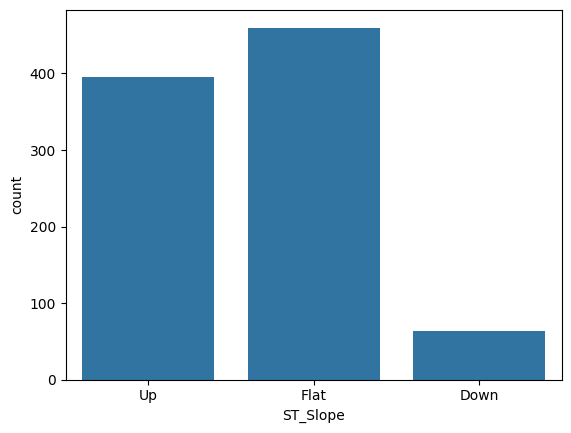

In [6]:

# Visualize the distribution of categories in 'Column1'
# sns.countplot(x='Sex', data=df) ## M,F
# sns.countplot(x='ChestPainType', data=df) ## ATA, NAP,ASY,TA
# sns.countplot(x='RestingECG', data=df) ## Normal, ST,LVH
sns.countplot(x='ST_Slope', data=df) ## Normal,ST,LVH
plt.show()

#### features engineering and standardization

In [7]:
## one-hot encoding
updatedDf = pd.get_dummies(df,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
updatedDf = updatedDf.astype(float)

In [8]:
## create new dataset which is clean
updatedDf.to_csv('heart_cleaned_dataset.csv')

In [9]:
## Reording the columns

# Get the name of the 5th column
fifth_column_name = updatedDf.columns[6]

# Create a new list of column names with the 5th column at the end
new_column_order = updatedDf.columns[:6].tolist() + updatedDf.columns[7:].tolist() + [fifth_column_name]

# Reorder the DataFrame
updatedDf = updatedDf[new_column_order]

In [10]:
## dependent and independent feature split
X = updatedDf.iloc[:,:20]
Y = updatedDf.iloc[:,20]

In [11]:
updatedDf.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,-0.055750,0.055750,0.166607,-0.218165,...,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,-0.005133,0.005133,0.048824,-0.046153,...,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,0.200092,-0.200092,-0.120531,0.150954,...,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,-0.120076,0.120076,0.131176,-0.140514,...,0.026885,-0.011656,-0.093028,0.127110,-0.060451,0.060451,0.105102,0.107006,-0.161730,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,0.189186,-0.189186,-0.354963,0.253735,...,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,-0.105734,0.105734,0.280026,-0.262124,...,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577,0.403951
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,1.000000,-1.000000,-0.183876,0.161522,...,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942,-0.305445
Sex_M,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,-1.000000,1.000000,0.183876,-0.161522,...,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942,0.305445
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,-0.183876,0.183876,1.000000,-0.522432,...,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443,0.516716
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,0.161522,-0.161522,-0.522432,1.000000,...,-0.110679,-0.085791,0.107941,-0.046111,0.300365,-0.300365,-0.097754,-0.304667,0.357588,-0.401924


In [12]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=10)

In [13]:
## features scalling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
## model training
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(X_train,Y_train)

LogisticRegression()

In [15]:
y_pred = regression.predict(X_test)

In [16]:
# performance metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.8478260869565217
[[106  21]
 [ 21 128]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       127
         1.0       0.86      0.86      0.86       149

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



ValueError: x and y must be the same size

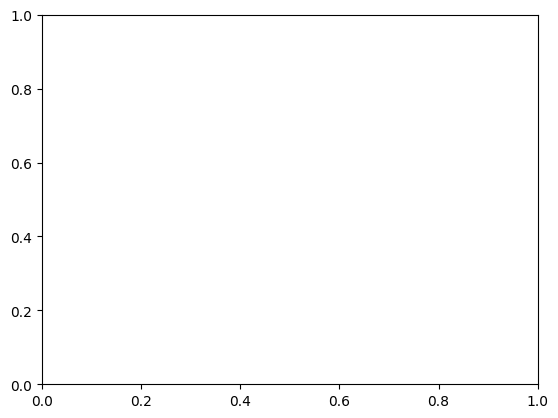

In [17]:
# Plot the data and the logistic regression curve
plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.show()

#### Hypertunning and cross-validation

In [18]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','saga','sag']
c_values = [100,10,1.0,0.1,0.01]

In [19]:
params = dict(penalty=penalty,C=c_values,solver=solver)

In [20]:
## stratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
cv = StratifiedGroupKFold()

In [21]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring='accuracy')

In [22]:
# grid.fit(X_train,Y_train)
Y_train

913    1.0
7      0.0
687    0.0
808    1.0
765    0.0
      ... 
369    1.0
320    1.0
527    0.0
125    0.0
265    0.0
Name: HeartDisease, Length: 642, dtype: float64